In [75]:
import pandas as pd
import numpy as np
from helpers import tts_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [76]:
df = pd.read_csv(r'../data/final.csv', index_col=0)
df = df.dropna()
df['Credit Risk Code'] = df['Credit Risk Code'].astype(int).astype(str)
df.head()

,PK,Date,Qdate,Balance,Days Past Due,Past_Due30_59,Past_Due60_89,Past_Due90+,Credit Risk Code,Adversity,...,DEVELOPING_ASIA_REAL_GDP_GROWTH,DEVELOPING_ASIA_INFLATION,DEV_ASIA_BILATERAL_DOLLAR_EXCHANGE_RATE,JAPAN_REAL_GDP_GROWTH,JAPAN_INFLATION,JAPAN_BILATERAL_DOLLAR_EXCHANGE_RATE,UK_REAL_GDP_GROWTH,UK_INFLATION,UK_BILATERAL_DOLLAR_EXCHANGE_RATE,Default
0,0,2015-01-31,Q1 2015,7685.03,15,10,5,1,5,Historical,...,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,1.0
1,1,2015-01-31,Q1 2015,181479.00,0,0,0,0,3,Historical,...,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
2,2,2015-01-31,Q1 2015,67382.89,0,0,0,0,3,Historical,...,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
3,3,2015-01-31,Q1 2015,115580.00,0,0,0,0,1,Historical,...,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0
4,4,2015-01-31,Q1 2015,111445.00,0,0,0,0,1,Historical,...,5.7,0.9,88.1,5.5,0.5,120.0,2.1,-1.1,1.485,0.0


# Create 3 groups of Credit Risk Code
## Reliable ==> 1,2,3
## Semi-Reliable ==> 4,5,6,7
## Unreliable ==> 8,9,10

In [77]:
df.loc[df['Credit Risk Code'].isin(['1','2','3']),'Credit Bagged'] = '0'
df.loc[df['Credit Risk Code'].isin(['4','5','6','7']),'Credit Bagged'] = '1'
df.loc[df['Credit Risk Code'].isin(['8','9','10']),'Credit Bagged'] = '2'

In [78]:
df.groupby(['Credit Bagged'])['Credit Bagged'].agg({'Credit Bagged':'count'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Credit Bagged
Credit Bagged,
0,178614
1,114701
2,2659


In [79]:
group = df.groupby(['Credit Bagged', 'Credit Risk Code']).agg({'Credit Risk Code':'count'})
group.columns = ['Count']
group

Count
Credit Bagged Credit Risk Code        
0             1                   9791
              2                    510
              3                 168313
1             4                  84239
              5                  13536
              6                   1413
              7                  15513
2             10                   443
              8                   1954
              9                    262

In [80]:
df.columns

Index(['PK', 'Date', 'Qdate', 'Balance', 'Days Past Due', 'Past_Due30_59',
       'Past_Due60_89', 'Past_Due90+', 'Credit Risk Code', 'Adversity',
       'QTR_CLOSE', 'REAL_GDP_GROWTH', 'NOMINAL_GDP_GROWTH',
       'REAL_DISPOSABLE_INCOME_GROWTH', 'NOMINAL_DISPOSABLE_INCOME_GROWTH',
       'UNEMPLOYMENT_RATE', 'CPI_INFLATION_RATE', 'THREE_MONTH_TREASURY_RATE',
       'FIVE_YEAR_TREASURY_YIELD', 'TEN_YEAR_TREASURY_YIELD',
       'BBB_CORPORATE_YEILD', 'MORTGAGE_RATE', 'PRIME_RATE',
       'DOWJONES_TOTAL_STOCK_MARKET_INDEX', 'HOUSE_PRICE_INDEX',
       'COMERCIAL_REAL_ESTATE_PRICE_INDEX', 'MARKET_VOLATILITY_INDEX',
       'EURO_AREA_REAL_GDP_GROWTH', 'EURO_AREA_INFLATION',
       'EURO_AREA_BILATERAL_DOLLAR_EXCHANGE_RATE',
       'DEVELOPING_ASIA_REAL_GDP_GROWTH', 'DEVELOPING_ASIA_INFLATION',
       'DEV_ASIA_BILATERAL_DOLLAR_EXCHANGE_RATE', 'JAPAN_REAL_GDP_GROWTH',
       'JAPAN_INFLATION', 'JAPAN_BILATERAL_DOLLAR_EXCHANGE_RATE',
       'UK_REAL_GDP_GROWTH', 'UK_INFLATION',
       'UK_

In [81]:
X = df[['Days Past Due', 'Balance', 'Past_Due30_59', 'Past_Due60_89', 'Past_Due90+', 'Credit Bagged']]
#X = df.drop(columns=['PK', 'Date', 'Qdate','Credit Risk Code','Adversity','QTR_CLOSE','Default'])

In [82]:
len(X)

295974

In [83]:
pd.DataFrame(np.array(X.columns).reshape(3,2))

,0,1
0,Days Past Due,Balance
1,Past_Due30_59,Past_Due60_89
2,Past_Due90+,Credit Bagged


In [84]:
x_train, x_test = train_test_split(X, random_state=42, test_size = 0.3)
train_bag = x_train['Credit Bagged']
test_bag = x_test['Credit Bagged']
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.drop(columns=['Credit Bagged']))
x_test = scaler.transform(x_test.drop(columns=['Credit Bagged']))

C:\Users\smr6743\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\smr6743\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [85]:
len(x_train), len(x_test)

(207181, 88793)

In [86]:
clf = KMeans(n_clusters=3, 
             random_state=42).fit(x_train)

In [87]:
bindict = {'0':'Reliable', '1':'Semi-Reliable','2':'Unreliable'}
rownames = []
for val in train_bag.values:
    rownames.append(bindict[val])
    
colnames = []
for val in clf.labels_:
    colnames.append(bindict[str(val)])

In [88]:
print(accuracy_score(train_bag, clf.labels_.astype(str)))
train_report = classification_report(train_bag, clf.labels_.astype(str), output_dict=True)
pd.DataFrame(train_report)

0.6108330397092397


,0,1,2,micro avg,macro avg,weighted avg
f1-score,0.764554,0.040692,0.237445,0.610833,0.347564,0.478904
precision,0.621596,0.691708,0.161686,0.610833,0.491663,0.644605
recall,0.992907,0.020962,0.446797,0.610833,0.486889,0.610833
support,124910.000000,80382.000000,1889.000000,207181.000000,207181.000000,207181.000000


In [89]:
crosstab_train = pd.crosstab(train_bag, clf.labels_)
crosstab_train.columns = ['0','1','2']
crosstab_train.rename(columns=bindict, index = bindict, inplace=True)
crosstab_train

,Reliable,Semi-Reliable,Unreliable
Credit Bagged,,,
Reliable,124024,744,142
Semi-Reliable,74463,1685,4234
Unreliable,1038,7,844


In [90]:
clf.inertia_

557419.0501303612

In [91]:
predictions = clf.predict(x_test)

In [92]:
print(accuracy_score(test_bag, predictions.astype(str)))
test_report = classification_report(test_bag, predictions.astype(str), output_dict=True)
pd.DataFrame(test_report)

0.6133028504499228


,0,1,2,micro avg,macro avg,weighted avg
f1-score,0.766272,0.043504,0.238047,0.613303,0.349275,0.482337
precision,0.623813,0.712963,0.160288,0.613303,0.499021,0.654250
recall,0.993055,0.022437,0.462338,0.613303,0.492610,0.613303
support,53704.000000,34319.000000,770.000000,88793.000000,88793.000000,88793.000000


In [93]:
crosstab_test = pd.crosstab(test_bag, predictions.astype(str))
crosstab_test.columns = ['0','1','2']
crosstab_test.rename(columns=bindict, index = bindict, inplace=True)
crosstab_test

,Reliable,Semi-Reliable,Unreliable
Credit Bagged,,,
Reliable,53331,308,65
Semi-Reliable,31749,770,1800
Unreliable,412,2,356


In [94]:
train_bag = [int(i) for i in train_bag.values]

In [95]:
train_colors = []
for bag, label in zip(train_bag,clf.labels_):
    if bag!=label:
        train_colors.append('Group Change')
    else:
        train_colors.append('No Change')

Text(0.5, 1.0, 'Days Past Due Against Balance Colored by Group Change (Training Set)')

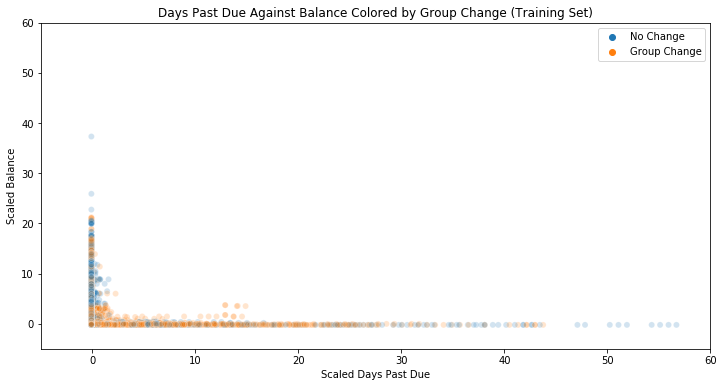

In [73]:
plt.subplots(figsize=(12,6))
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=train_colors, alpha=0.2)
plt.xlabel('Scaled Days Past Due')
plt.xlim(-5,60)
plt.ylim(-5,60)
plt.ylabel('Scaled Balance')
plt.title('Days Past Due Against Balance Colored by Group Change (Training Set)')

In [96]:
test_bag = [int(i) for i in test_bag.values]

In [97]:
test_colors = []
for bag, label in zip(test_bag,predictions):
    if bag!=label:
        test_colors.append('Group Change')
    else:
        test_colors.append('No Change')

Text(0.5, 1.0, 'Days Past Due Against Balance Colored by Group Change (Testing Set)')

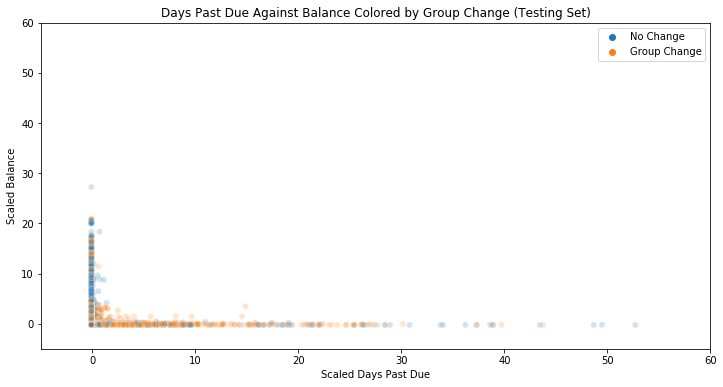

In [98]:
plt.subplots(figsize=(12,6))
sns.scatterplot(x=x_test[:,0], y=x_test[:,1], hue=test_colors, alpha=0.2)
plt.xlabel('Scaled Days Past Due')
plt.xlim(-5,60)
plt.ylim(-5,60)
plt.ylabel('Scaled Balance')
plt.title('Days Past Due Against Balance Colored by Group Change (Testing Set)')

In [101]:
original_train = pd.DataFrame(train_bag, columns = ['Original Tags'])
original_test = pd.DataFrame(test_bag, columns = ['Original Tags'])
original = original_train.append(original_test)
original.head()

,Original Tags
0,0
1,0
2,1
3,0
4,0


In [102]:
len(original)

295974

In [132]:
pd.DataFrame(original.groupby('Original Tags')['Original Tags'].size())

,Original Tags
Original Tags,
0,178614
1,114701
2,2659


Text(0.5, 1.0, 'Original Binning')

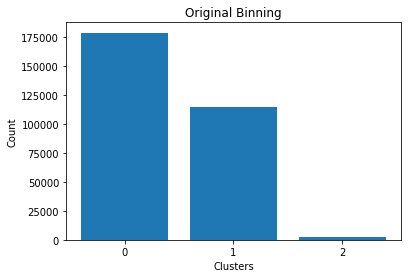

In [120]:
plt.bar([0,1,2],[178614,114701,2659])
plt.xticks([0,1,2])
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Original Binning')

In [128]:
predictions_train = pd.DataFrame(clf.labels_, columns = ['Predicted Tags'])
predictions_test = pd.DataFrame(predictions, columns = ['Predicted Tags'])
predictions_df = predictions_train.append(predictions_test)
predictions_df.head()

,Predicted Tags
0,0
1,0
2,0
3,0
4,0


In [129]:
len(predictions_df)

295974

In [131]:
pd.DataFrame(predictions_df.groupby('Predicted Tags')['Predicted Tags'].size())

,Predicted Tags
Predicted Tags,
0,285017
1,3516
2,7441


Text(0.5, 1.0, 'KMeans Binning')

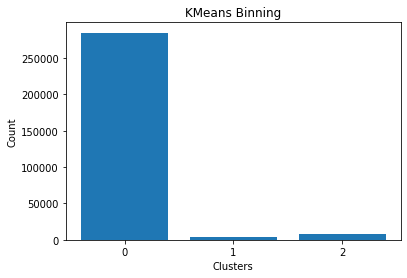

In [126]:
plt.bar([0,1,2],[285017,3516,7441])
plt.xticks([0,1,2])
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('KMeans Binning')